# Steam Store Games - Data Mining
##### Equipe (The Boys):
1. Nicolas Soares - 399048
2. Rebecca Maia - 
3. Klayver Paz 
4. Breno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv("steam.csv")
data

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


#### Descobrindo features

In [4]:
data.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

#### Avaliação da limpeza do dataset (presença de valores nulos)

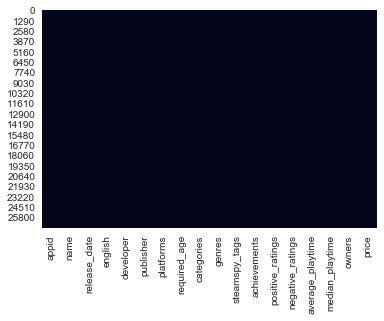

In [ ]:
# Verificação se há  algum valor nulo seria denotado de branco na figura abaixo - Tudo ok !!
plt.style.use("seaborn")
%matplotlib inline
sns.heatmap(data.isnull(), cbar =  False)

#### 10 desenvolvedores com mais jogos disponíveis na steam

In [ ]:
data.developer.value_counts().head(10)

Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
Humongous Entertainment       36
Name: developer, dtype: int64

#### 10 maiores publishers na steam

In [ ]:
data.publisher.value_counts().head(10)

Big Fish Games         212
Strategy First         136
Ubisoft                111
THQ Nordic              98
Square Enix             97
Sekai Project           96
Choice of Games         94
Dagestan Technology     88
1C Entertainment        88
SEGA                    78
Name: publisher, dtype: int64

## Avaliação de 3 grandes publishers

### Ubisoft 

#### Ubisoft

In [ ]:
ubi = data[data["publisher"] == "Ubisoft"]
ubi.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
44,2100,Dark Messiah of Might & Magic,2006-10-25,1,Arkane Studios,Ubisoft,windows,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action;RPG,RPG;Action;First-Person,0,4386,316,634,700,1000000-2000000,4.29
60,2450,Bloody Good Time,2010-10-29,1,Outerlight Ltd.,Ubisoft,windows,0,Single-player;Multi-player;Steam Achievements,Action,Action;Multiplayer;FPS,12,662,204,193,193,100000-200000,4.29
184,7200,Trackmania United Forever Star Edition,2008-04-16,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;Includes level editor,Racing,Racing;Multiplayer;Level Editor,0,963,55,4774,4774,100000-200000,25.99
268,11020,TrackMania Nations Forever,2008-04-16,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;Includes level editor,Racing,Racing;Free to Play;Multiplayer,0,8252,1244,902,87,2000000-5000000,0.00
334,13500,Prince of Persia: Warrior Within™,2009-08-27,1,Ubisoft,Ubisoft,windows,0,Single-player,Action;Adventure,Action;Adventure;Parkour,0,657,101,307,312,200000-500000,8.59


#### Plataformas mais utilizadas - Ubisoft

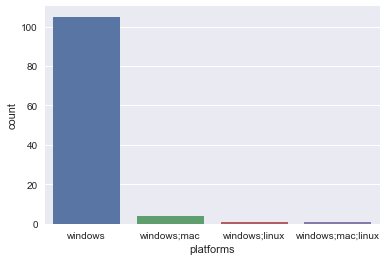

In [ ]:
sns.countplot(ubi.platforms)

####  15 games mais caros da Ubisoft

In [ ]:
ubi.nlargest(15, "price")

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
8251,447040,Watch_Dogs® 2,2016-11-28,1,Ubisoft,Ubisoft,windows,0,Single-player;Co-op;In-App Purchases;Partial C...,Action;Adventure,Illuminati;Open World;Hacking,0,20905,5366,1231,1342,500000-1000000,49.99
9494,488790,South Park™: The Fractured But Whole™,2017-10-16,1,Ubisoft San Francisco,Ubisoft,windows,18,Single-player;Steam Achievements;Steam Trading...,Sexual Content;Nudity;Violent;Gore;RPG,RPG;Comedy;Dark Humor,35,4840,2017,932,976,200000-500000,49.99
11868,552520,Far Cry® 5,2018-03-26,1,Ubisoft Montreal;Red Storm;Ubisoft Shanghai;Ub...,Ubisoft,windows,0,Single-player;Multi-player;Co-op;Steam Trading...,Action;Adventure,Open World;Action;FPS,0,23373,11081,1869,1694,500000-1000000,49.99
12968,582160,Assassin's Creed® Origins,2017-10-26,1,Ubisoft Montreal,Ubisoft,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;RPG,Open World;Assassin;Action,67,31644,6007,2908,3143,1000000-2000000,49.99
14890,646910,The Crew™ 2,2018-06-28,1,Ivory Tower,Ubisoft,windows,0,Single-player;Online Multi-Player;MMO;Online C...,Action;Massively Multiplayer;Racing,Racing;Open World;Driving,34,4030,3916,2029,1685,200000-500000,49.99
20768,812140,Assassin's Creed® Odyssey,2018-10-05,1,Ubisoft Quebec;Ubisoft Montreal;Ubisoft Buchar...,Ubisoft,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;RPG,Open World;Action;RPG,82,20771,4528,3151,3581,1000000-2000000,49.99
5472,365590,Tom Clancy’s The Division™,2016-03-07,1,Massive Entertainment,Ubisoft,windows,18,Single-player;Multi-player;Co-op;Steam Trading...,Action;Adventure;RPG,Open World;Multiplayer;Third-Person Shooter,0,49832,25607,4252,1952,2000000-5000000,41.99
5726,371660,Far Cry® Primal,2016-02-29,1,Ubisoft,Ubisoft,windows,18,Single-player;Steam Trading Cards;Partial Cont...,Action;Adventure,Open World;Survival;Action,0,8428,2633,949,923,500000-1000000,41.99
8231,446560,Just Dance 2017,2016-10-27,1,Ubisoft Paris;Ubisoft Pune,Ubisoft,windows,0,Single-player;Online Multi-Player;Local Multi-...,Casual,Music;Multiplayer;Casual,0,1182,246,0,0,20000-50000,41.99
8766,460930,Tom Clancy's Ghost Recon® Wildlands,2017-03-06,1,Ubisoft Paris;Ubisoft Annecy;Ubisoft Bucharest...,Ubisoft,windows,0,Single-player;Multi-player;Co-op;Steam Trading...,Action;Adventure,Open World;Shooter;Action,0,26547,9944,1987,1242,1000000-2000000,41.99


In [ ]:
ubi.nlargest(15, "price").price.describe()

count    15.000000
mean     42.790000
std       6.794956
min      33.990000
25%      35.990000
50%      41.990000
75%      49.990000
max      49.990000
Name: price, dtype: float64

In [ ]:
ubi.nlargest(15, "median_playtime")

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1659,232910,TrackMania² Stadium,2013-06-20,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;VR Support;Steam Wo...,Racing;Sports,Racing;Multiplayer;Level Editor,0,2915,571,6516,9562,500000-1000000,8.59
5878,375900,Trackmania® Turbo,2016-03-24,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;Shared/Split Screen...,Massively Multiplayer;Racing,Racing;Level Editor;Arcade,0,742,441,8159,8159,50000-100000,33.99
1512,221680,Rocksmith® 2014 Edition - Remastered,2016-10-04,1,Ubisoft - San Francisco,Ubisoft,windows;mac,0,Single-player;Shared/Split Screen;Steam Achiev...,Casual;Simulation,Music;Education;Simulation,47,8228,789,6704,7089,500000-1000000,25.99
357,15370,Heroes of Might & Magic V: Tribes of the East,2008-10-10,1,Nival,Ubisoft,windows,0,Single-player,Strategy,Strategy;Turn-Based Strategy;Turn-Based,0,759,66,6679,6679,200000-500000,8.59
1616,228760,TrackMania² Canyon,2013-02-27,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;VR Support;Steam Wo...,Racing;Sports,Racing;Multiplayer;Level Editor,0,1065,259,3793,5675,100000-200000,16.99
184,7200,Trackmania United Forever Star Edition,2008-04-16,1,Nadeo,Ubisoft,windows,0,Single-player;Multi-player;Includes level editor,Racing,Racing;Multiplayer;Level Editor,0,963,55,4774,4774,100000-200000,25.99
5879,375910,Anno 2205™,2015-11-02,1,Blue Byte,Ubisoft,windows,0,Single-player;Steam Achievements;Steam Trading...,Simulation;Strategy,Strategy;City Builder;Simulation,198,2141,1245,1930,3613,200000-500000,33.99
20768,812140,Assassin's Creed® Odyssey,2018-10-05,1,Ubisoft Quebec;Ubisoft Montreal;Ubisoft Buchar...,Ubisoft,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;RPG,Open World;Action;RPG,82,20771,4528,3151,3581,1000000-2000000,49.99
12968,582160,Assassin's Creed® Origins,2017-10-26,1,Ubisoft Montreal,Ubisoft,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;RPG,Open World;Assassin;Action,67,31644,6007,2908,3143,1000000-2000000,49.99
5235,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,1,Ubisoft Montreal,Ubisoft,windows,0,Single-player;Multi-player;Co-op;Steam Trading...,Action,FPS;Multiplayer;Tactical,0,251178,59620,7504,2543,5000000-10000000,16.99


In [ ]:
ubi.nlargest(15, "median_playtime").price.describe()

count    15.000000
mean     26.843333
std      14.193453
min       8.590000
25%      16.990000
50%      25.990000
75%      35.990000
max      49.990000
Name: price, dtype: float64

#### Visão sobre lançamentos nos anos

In [ ]:
releases = ubi.release_date

In [ ]:
for line, dates in enumerate(releases):
    releases.iloc[line] = releases.iloc[line][:4]

C:\Users\klayver\Miniconda3\envs\lizzard\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


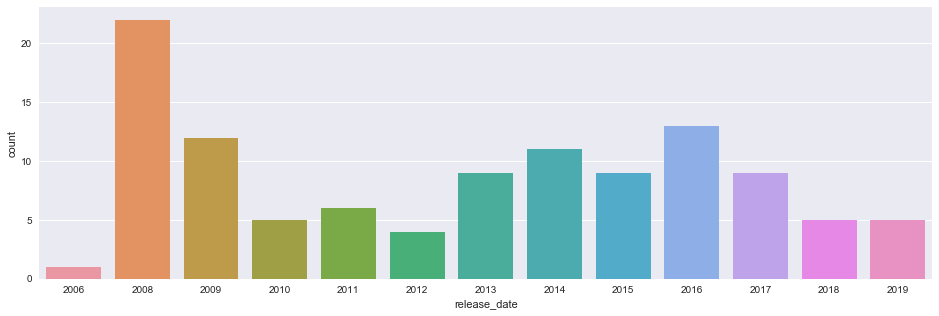

In [ ]:
plt.figure(figsize = (16,5))
sns.countplot(releases)

#### Visão sobre vendas

In [ ]:
ubi.owners.unique()

array(['1000000-2000000', '100000-200000', '2000000-5000000',
       '200000-500000', '500000-1000000', '20000-50000', '0-20000',
       '50000-100000', '10000000-20000000', '5000000-10000000'],
      dtype=object)

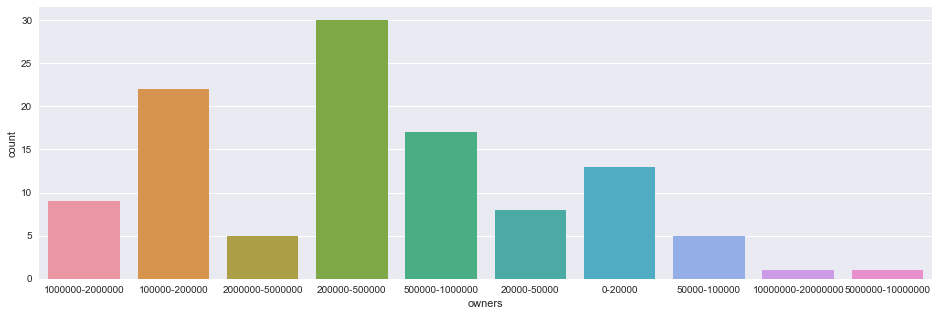

In [ ]:
# plt.figure(figsize = (16,5))
# sns.countplot(ubi.owners)
ordenar

In [ ]:
ubi[ubi["owners"] == "5000000-10000000"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
5235,359550,Tom Clancy's Rainbow Six® Siege,2015,1,Ubisoft Montreal,Ubisoft,windows,0,Single-player;Multi-player;Co-op;Steam Trading...,Action,FPS;Multiplayer;Tactical,0,251178,59620,7504,2543,5000000-10000000,16.99


In [ ]:
ubi[ubi["owners"] == "10000000-20000000"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2952,291550,Brawlhalla,2017,1,Blue Mammoth Games,Ubisoft,windows;mac,0,Single-player;Multi-player;Online Multi-Player...,Action;Free to Play;Indie,Free to Play;Multiplayer;Fighting,39,73268,14489,724,146,10000000-20000000,0.0


In [ ]:
ubi[ubi["owners"] == "10000000-20000000"]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2952,291550,Brawlhalla,2017,1,Blue Mammoth Games,Ubisoft,windows;mac,0,Single-player;Multi-player;Online Multi-Player...,Action;Free to Play;Indie,Free to Play;Multiplayer;Fighting,39,73268,14489,724,146,10000000-20000000,0.0


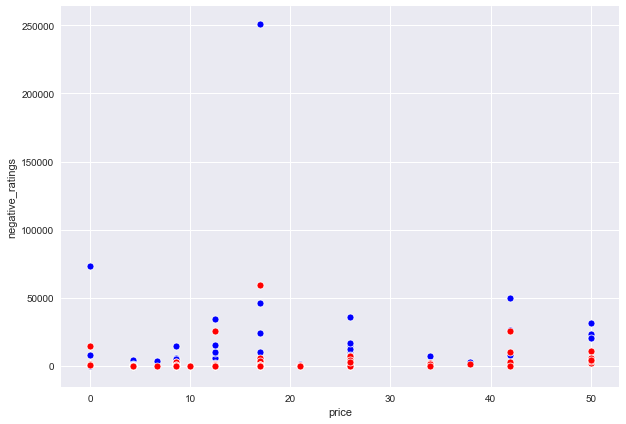

In [ ]:
plt.figure(figsize = (10,7))
sns.scatterplot(ubi.price, ubi.positive_ratings, color = "blue")
sns.scatterplot(ubi.price, ubi.negative_ratings, color = "red")


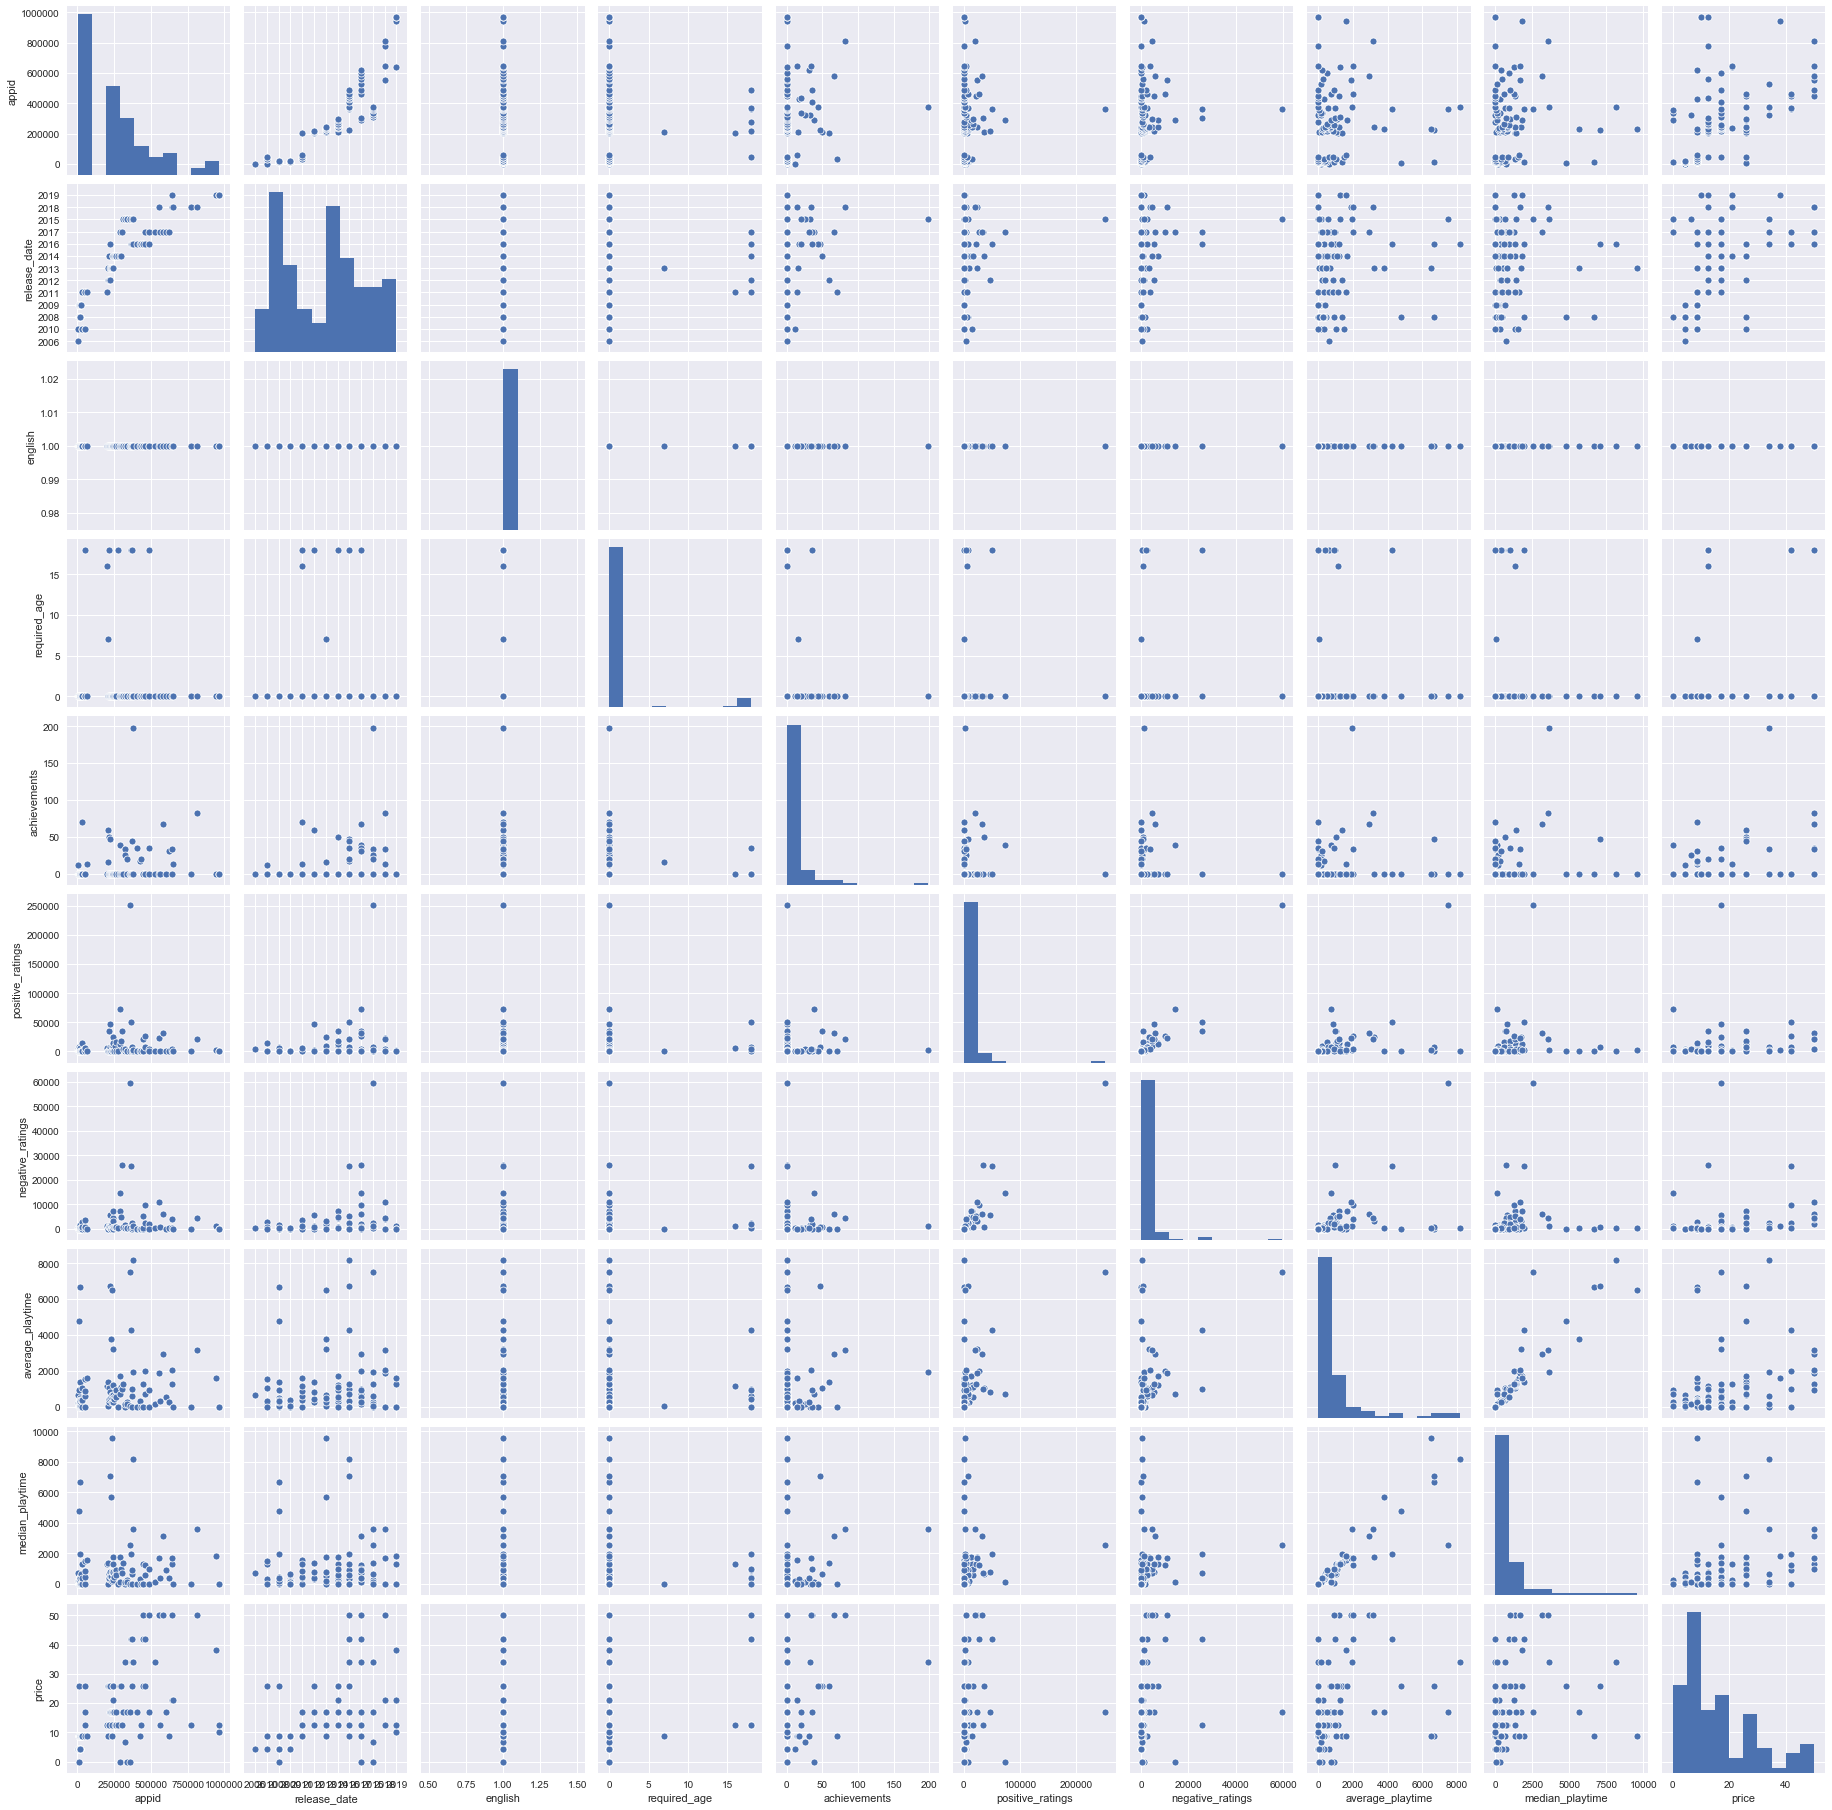

In [ ]:
sns.pairplot(ubi)

1 - Usar markdown
2 - Fazer analises para as 4 empresas
3 - Verificar date do dataframe
4 - Nao colorir o graf temporal para uma empresa
